# ***Deep Learning***

In [88]:
import numpy             as np
import matplotlib.pyplot as plt
from keras.datasets      import mnist # Números
from keras.models        import Sequential
from keras.layers        import Dense, Dropout
from keras.utils         import np_utils
from sklearn.metrics     import confusion_matrix

## **Obtenção dos dados e divisão automática entre treinamento e teste**
### - mnist faz a divisão automática

In [89]:
(X_treinamento, y_treinamento), (X_teste, y_teste) = mnist.load_data()

Text(0.5, 1.0, '0')

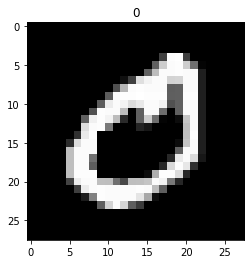

In [90]:
# Visualização de imagens específicas
plt.imshow(X_treinamento[21], cmap = 'gray')
plt.title(y_treinamento[21])

## **Mudança de dimensão**
### - Originalmente está em 28x28, mas precisamos 784

In [91]:
np.prod(X_teste.shape[1:])

784

In [92]:
X_treinamento = X_treinamento.reshape((len(X_treinamento), np.prod(X_treinamento.shape[1:])))
X_teste = X_teste.reshape((len(X_teste), np.prod(X_teste.shape[1:])))

X_teste[0]

array([  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
         0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   

## **Transformação dos dados para float**
### - Para podermos normalizar os dados

In [93]:
X_treinamento = X_treinamento.astype('float32')
X_teste = X_teste.astype('float32')

## **Normalização**
### - 255 é o valor máximo de um pixel

In [94]:
X_treinamento /= 255
X_teste /= 255

## **Transformação para o formato dummy**
### - Temos 10 classes

In [95]:
y_treinamento = np_utils.to_categorical(y_treinamento, 10)
y_teste = np_utils.to_categorical(y_teste, 10)

y_teste[0]

array([0., 0., 0., 0., 0., 0., 0., 1., 0., 0.], dtype=float32)

## **Estruturando a Rede neural**
### - Estrutura da rede neural: 784 - 64 - 64 - 64 - 10
### - Dropout é utilizado para zerar uma porcentagem dos neurônios, para evitar o overfitting

In [96]:
modelo = Sequential()

modelo.add(Dense(units = 64, activation = 'relu', input_dim = 784))
modelo.add(Dropout(0.2)) # 20% dos dados da camada serão zerados

modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))

modelo.add(Dense(units = 64, activation = 'relu'))
modelo.add(Dropout(0.2))

# Camada de saída com 10 unidades, pois temos 10 opções de números, softmax para probabilidade de caracteres
modelo.add(Dense(units = 10, activation = 'softmax'))

In [97]:
modelo.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_8 (Dense)             (None, 64)                50240     
                                                                 
 dropout_6 (Dropout)         (None, 64)                0         
                                                                 
 dense_9 (Dense)             (None, 64)                4160      
                                                                 
 dropout_7 (Dropout)         (None, 64)                0         
                                                                 
 dense_10 (Dense)            (None, 64)                4160      
                                                                 
 dropout_8 (Dropout)         (None, 64)                0         
                                                                 
 dense_11 (Dense)            (None, 10)               

## **Configuração da Rede Neural e Treinamento**
### - Utilizamos a base de dados de validação
### - Na variável histórico temos os históricos das execuções (erro e accuracy)

In [98]:
modelo.compile(optimizer = 'adam', loss = 'categorical_crossentropy',
               metrics = ['accuracy'])

historico = modelo.fit(X_treinamento, y_treinamento, epochs = 100,
                       validation_data = (X_teste, y_teste))

Epoch 1/100
1875/1875 [==============================] - 2s 1ms/step - loss: 0.4507 - accuracy: 0.8631 - val_loss: 0.1670 - val_accuracy: 0.9494
Epoch 2/100
1875/1875 [==============================] - 2s 874us/step - loss: 0.2285 - accuracy: 0.9343 - val_loss: 0.1293 - val_accuracy: 0.9619
Epoch 3/100
1875/1875 [==============================] - 2s 853us/step - loss: 0.1900 - accuracy: 0.9451 - val_loss: 0.1084 - val_accuracy: 0.9679
Epoch 4/100
1875/1875 [==============================] - 2s 846us/step - loss: 0.1648 - accuracy: 0.9524 - val_loss: 0.0996 - val_accuracy: 0.9708
Epoch 5/100
1875/1875 [==============================] - 2s 880us/step - loss: 0.1509 - accuracy: 0.9554 - val_loss: 0.0974 - val_accuracy: 0.9697
Epoch 6/100
1875/1875 [==============================] - 2s 851us/step - loss: 0.1384 - accuracy: 0.9593 - val_loss: 0.0916 - val_accuracy: 0.9741
Epoch 7/100
1875/1875 [==============================] - 2s 861us/step - loss: 0.1334 - accuracy: 0.9606 - val_loss: 0.0

## **Visualização dos `erros` e `accuracy`**

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


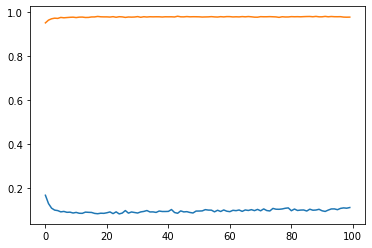

In [99]:
print(historico.history.keys())

# Evolução do erro, azul
plt.plot(historico.history['val_loss'])

# Performance da rede
plt.plot(historico.history['val_accuracy'])


## **Obtenção das Previsões**

In [100]:
previsoes = modelo.predict(X_teste)
previsoes

array([[1.9992750e-20, 6.4440266e-11, 5.7798596e-11, ..., 1.0000000e+00,
        1.8316039e-19, 9.5590014e-10],
       [1.4150252e-18, 3.1007159e-09, 1.0000000e+00, ..., 3.0890440e-10,
        3.2761371e-14, 1.6019183e-17],
       [9.0322206e-22, 1.0000000e+00, 5.1827327e-11, ..., 3.5610077e-09,
        7.1719172e-11, 4.7362368e-18],
       ...,
       [1.8107840e-18, 2.1355329e-12, 8.1310958e-11, ..., 1.6223357e-09,
        7.7843813e-13, 4.5366100e-08],
       [5.9708489e-28, 3.6513263e-21, 1.2953418e-21, ..., 7.4128824e-23,
        9.5933678e-19, 1.1857248e-20],
       [3.4268002e-14, 3.2749544e-19, 1.9518199e-15, ..., 7.1929674e-20,
        2.7922686e-17, 2.2472418e-23]], dtype=float32)

## **Matriz de Confusão**

In [101]:
y_teste_matriz = [np.argmax(t) for t in y_teste]
y_previsoes_matriz = [np.argmax(t) for t in previsoes]

confusao = confusion_matrix(y_teste_matriz, y_previsoes_matriz)
confusao

array([[ 969,    1,    1,    2,    0,    2,    3,    1,    1,    0],
       [   0, 1123,    3,    1,    0,    1,    1,    1,    5,    0],
       [   4,    1, 1013,    4,    2,    0,    1,    4,    3,    0],
       [   3,    0,    5,  981,    0,   10,    0,    4,    1,    6],
       [   1,    0,    4,    0,  954,    0,    5,    0,    1,   17],
       [   3,    1,    0,    5,    1,  862,   11,    1,    5,    3],
       [   8,    2,    0,    1,    3,    6,  937,    0,    1,    0],
       [   0,    3,    8,    4,    2,    0,    0, 1006,    0,    5],
       [   7,    2,    5,    2,    7,    6,    0,    5,  930,   10],
       [   2,    4,    0,    6,    6,    7,    0,    2,    2,  980]],
      dtype=int64)

## **Testando modelo em produção**

In [102]:
# Previsão com um novo registro, convertendo o array para o formato de matriz
# Número 4
y_treinamento[20]

array([0., 0., 0., 0., 1., 0., 0., 0., 0., 0.], dtype=float32)

In [103]:
# Passo a mesma posição para o modelo prever
novo = X_treinamento[20]

# De matriz para vetor
novo = np.expand_dims(novo, axis = 0) # Expande o tamanho do array

# Previsao
pred = modelo.predict(novo)

# Maior valor
pred = [np.argmax(pred) for t in pred]
pred

# PREDIÇÃO CORRETA

[4]